In [75]:
import mnist_util as mu
import numpy as np
%matplotlib inline
# importing training images and test images
X_train, Y_train, X_test, Y_test = mu.get_np_array()


In [76]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', Y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', Y_test.shape)


Training data shape:  (60000, 784)
Training labels shape:  (60000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


In [77]:
# Reshape the image data into rows
#X_train = np.reshape(X_train, (X_train.shape[0], -1))
#X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


(5923, 784)
(10, 550, 784)
(5500, 784)
(5500,)
(5700, 784)
(5700,)


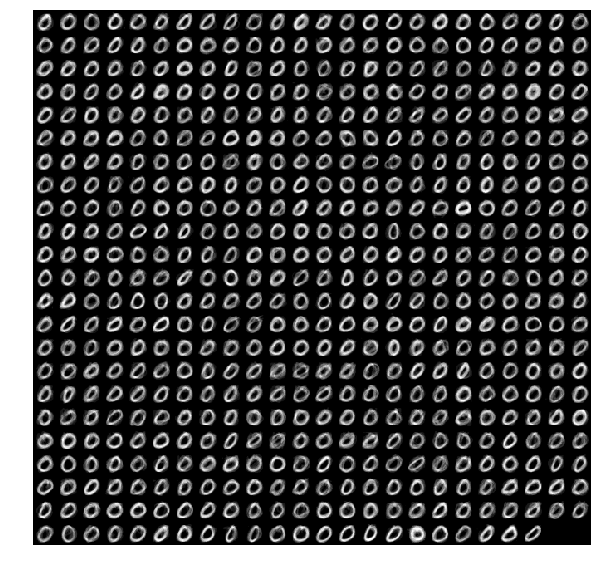

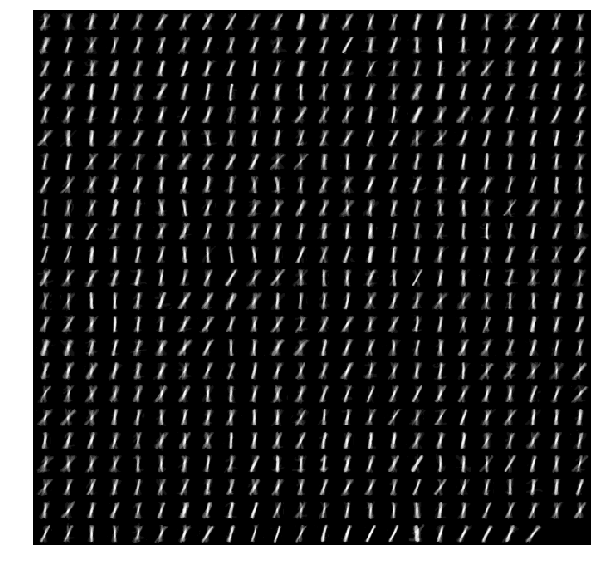

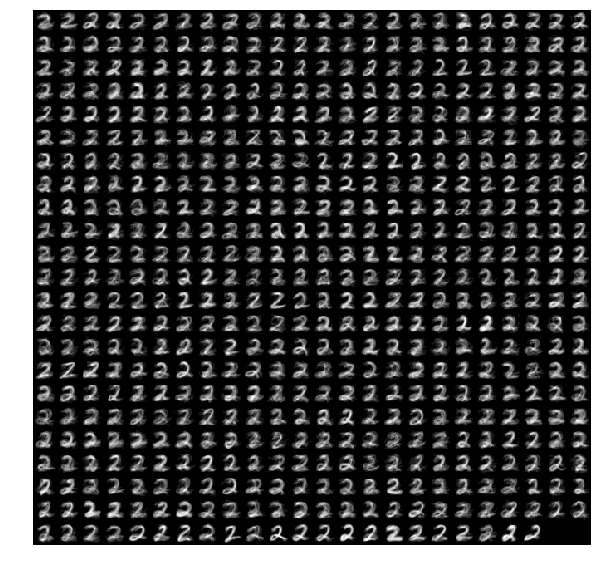

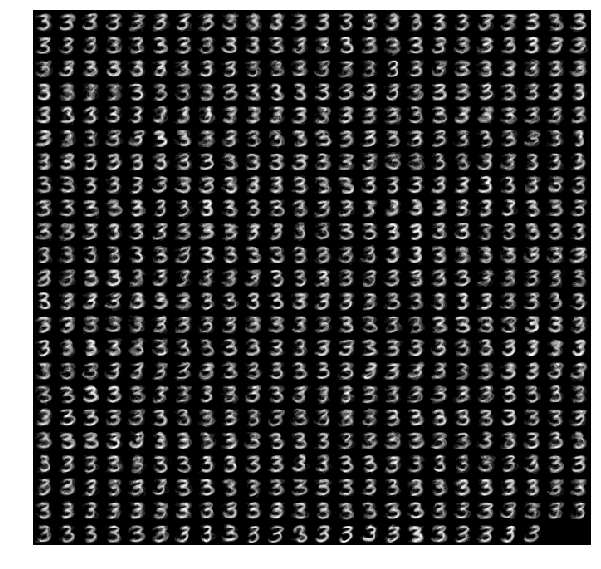

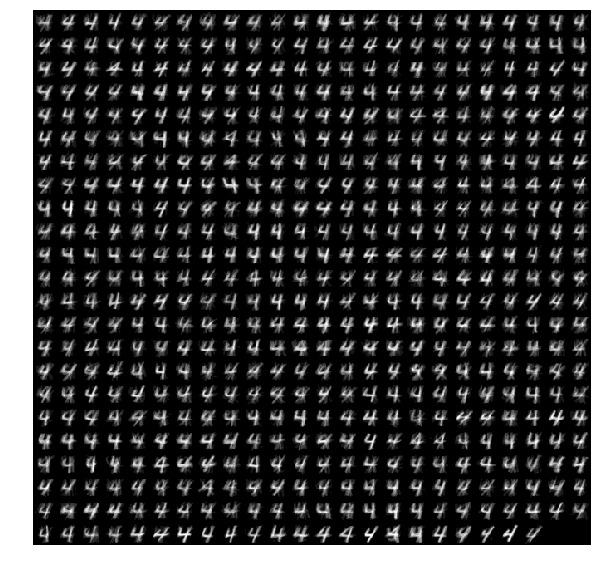

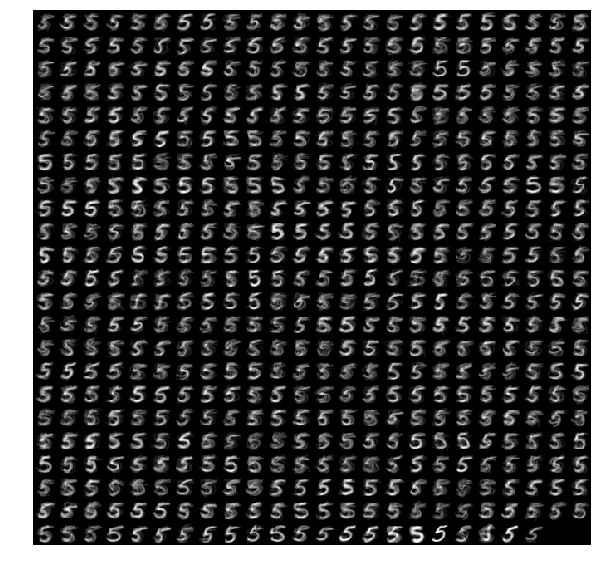

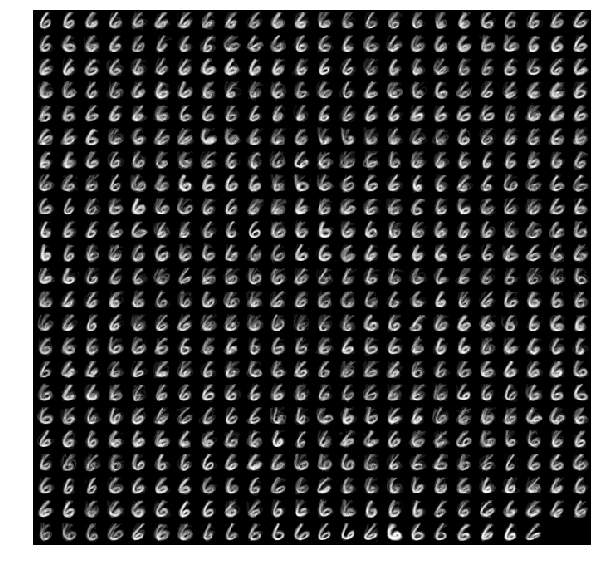

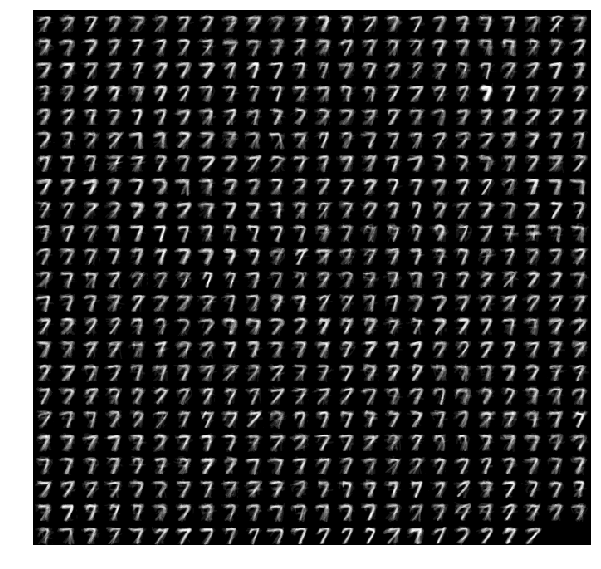

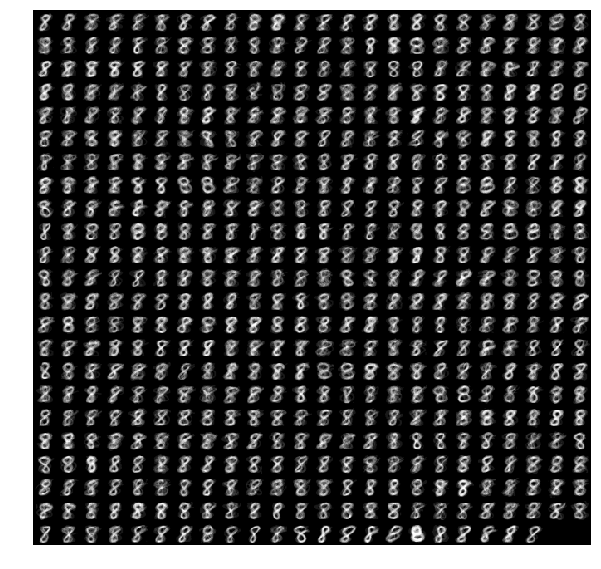

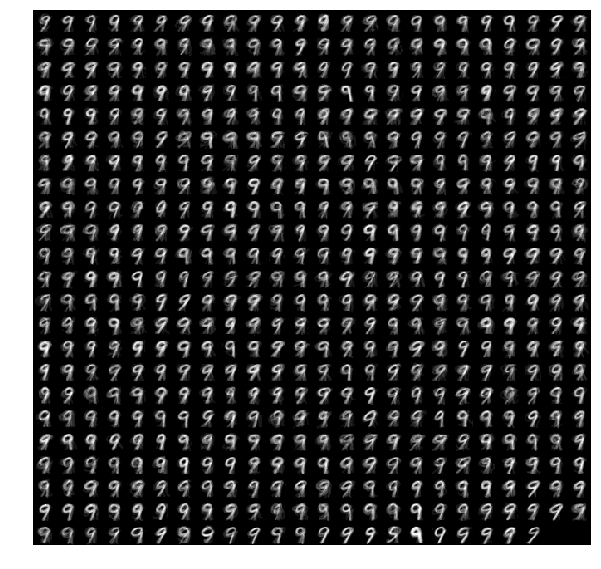

In [78]:
splits= 550
num_arrays = np.array(mu.get_all_nums(X_train, Y_train))
print(num_arrays[0].shape)
num=[np.array_split(num_arrays[i],splits) for i in range(10)]
num=np.array(num)
mean_data = [[np.mean(num[j][i], axis=0) for i in range(splits)] for j in range(10)]
[mu.show_nums(np.array(mean_data[i])[:splits], xsize=10, ysize=10) for i in range(10)]
mean_label=np.tile(np.array(list(range(10))),(splits,1)).flatten(order='F')
mean_data=np.array(mean_data)
print(mean_data.shape)
mean_data = mean_data.reshape(splits*10,784)
print(mean_data.shape)
print(mean_label.shape)
splits_t = 20
num_arrays_t = np.array(mu.get_all_nums(X_train, Y_train))
#from random import shuffle
#for i in range(10):
#    num_arrays[i]=np.array(shuffle(num_arrays_t[i]))
num_t=[np.array_split(num_arrays_t[i],splits_t) for i in range(10)]
num_t=np.array(num_t)
mean_data_t = [[np.mean(num_t[j][i], axis=0) for i in range(splits_t)] for j in range(10)]
mean_label_t=np.tile(np.array(list(range(10))),(splits_t,1)).flatten(order='F')
mean_data_t=np.array(mean_data_t)
mean_data_t = mean_data_t.reshape(splits_t*10,784)
mean_data = np.append(mean_data,mean_data_t)
mean_label = np.append(mean_label,mean_label_t)
mean_data = mean_data.reshape((splits+splits_t)*10,784)
print(mean_data.shape)
print(mean_label.shape)


In [79]:
from classifier.k_nearest_neighbor import KNearestNeighbor
classifier = KNearestNeighbor()
classifier.train(np.array(mean_data), np.array(mean_label))

dists = classifier.compute_distances_no_loops(X_test)
print(dists.shape)


(10000, 5700)


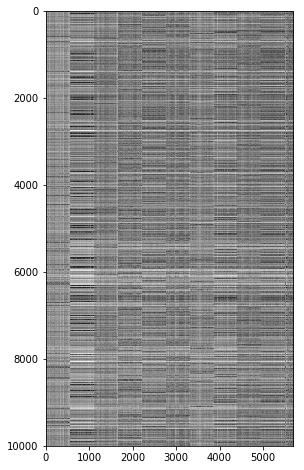

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.imshow(dists, interpolation='none')
plt.show()


In [81]:
Y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(Y_test_pred == Y_test)
accuracy = float(num_correct) / len(Y_test)
print('Got %d / %d correct => accuracy: %f' % (num_correct, len(Y_test), accuracy))

Got 9263 / 10000 correct => accuracy: 0.926300


(95, 784)
[1.0, 1.0, 9.0, 1.0, 1.0, 2.0, 9.0, 1.0, 1.0, 2.0, 9.0, 1.0, 9.0, 8.0, 9.0, 9.0, 8.0, 2.0, 1.0, 1.0, 1.0, 9.0, 1.0, 9.0, 9.0, 1.0, 4.0, 1.0, 2.0, 2.0, 9.0, 1.0, 9.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 9.0, 9.0, 1.0, 1.0, 4.0, 1.0, 1.0, 2.0, 9.0, 9.0, 1.0, 1.0, 4.0, 1.0, 9.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 9.0, 9.0, 1.0, 1.0, 4.0, 4.0, 8.0, 9.0, 1.0, 1.0, 1.0, 9.0, 2.0, 9.0, 9.0, 9.0, 9.0, 1.0, 9.0, 0.0, 9.0, 9.0, 1.0, 1.0, 8.0, 1.0, 9.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0]


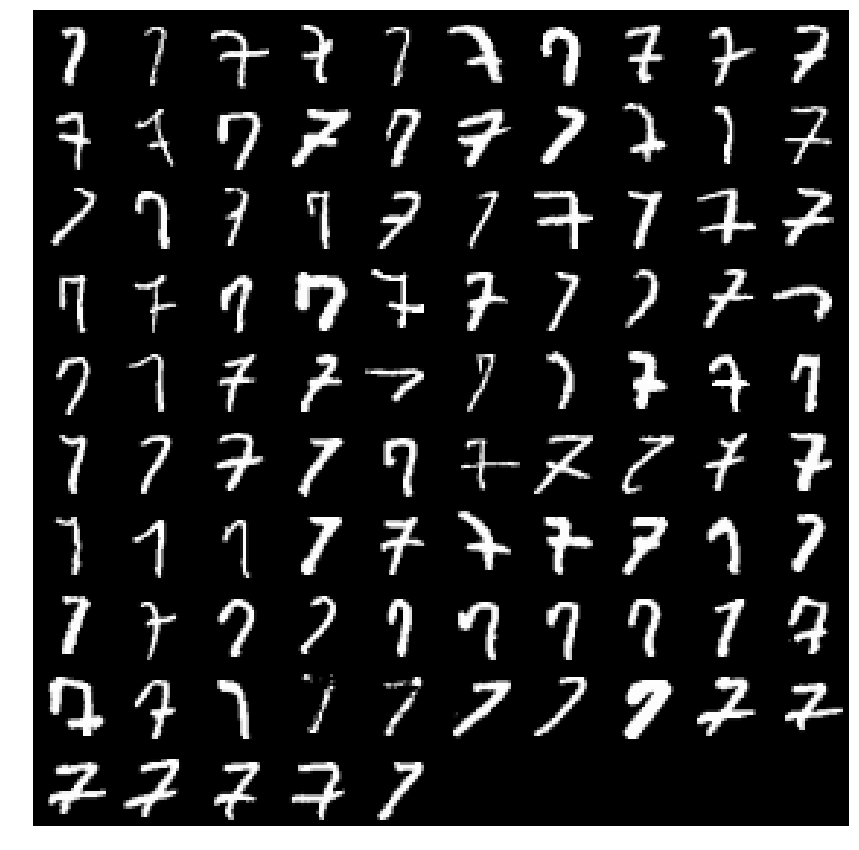

In [82]:
#print images predicted wrong
nums=[]
numslabel=[]
for i in range(Y_test.size):
        if(Y_test[i]!=Y_test_pred[i] and Y_test[i]==7):
            nums.append(X_test[i])
            numslabel.append(Y_test_pred[i])
print(np.array(nums).shape)
print(numslabel)
mu.show_nums(np.array(nums))

In [83]:
k_choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 50]
from sklearn.metrics import confusion_matrix
counter=0
cm=np.empty([18,10,10],dtype=np.int32)
for k in k_choices:
    Y_test_pred = classifier.predict_labels(dists, k=k)
    num_correct = np.sum(Y_test_pred == Y_test)
    accuracy = float(num_correct) / len(Y_test)
    print('for %d Got %d / %d correct => accuracy: %f' % (k,num_correct, len(Y_test), accuracy))
    cm[counter] = confusion_matrix(Y_test, Y_test_pred)
    counter=counter+1

for 1 Got 9263 / 10000 correct => accuracy: 0.926300
for 2 Got 9204 / 10000 correct => accuracy: 0.920400
for 3 Got 9227 / 10000 correct => accuracy: 0.922700
for 4 Got 9212 / 10000 correct => accuracy: 0.921200
for 5 Got 9217 / 10000 correct => accuracy: 0.921700
for 6 Got 9189 / 10000 correct => accuracy: 0.918900
for 7 Got 9205 / 10000 correct => accuracy: 0.920500
for 8 Got 9188 / 10000 correct => accuracy: 0.918800
for 9 Got 9168 / 10000 correct => accuracy: 0.916800
for 10 Got 9152 / 10000 correct => accuracy: 0.915200
for 12 Got 9142 / 10000 correct => accuracy: 0.914200
for 15 Got 9110 / 10000 correct => accuracy: 0.911000
for 20 Got 9084 / 10000 correct => accuracy: 0.908400
for 50 Got 8950 / 10000 correct => accuracy: 0.895000


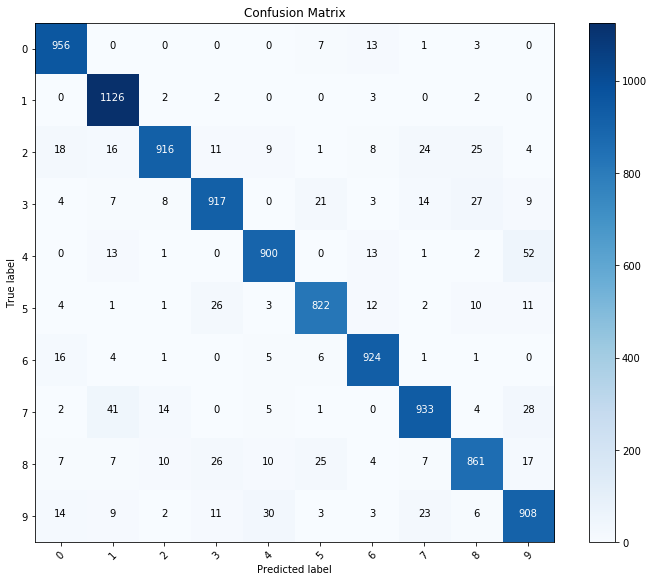

In [84]:
mu.plot_confusion_matrix(cm[0], title='Confusion Matrix',classes=np.arange(10))